<a href="https://colab.research.google.com/github/renadalahmadi/ML_Bootcamp/blob/main/Data_Binning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as rData
import numpy as np
import matplotlib.pyplot as myPlot

url = "/content/drive/MyDrive/SA-COVID19v1.xlsx"
Data =  rData.read_excel(url , skipfooter= 29599)
print(Data)

In [ ]:
Data.drop(["Daily / Cumulative" , "Date"], axis= 1, inplace = True) 

In [ ]:
#checking missing values and replacing it
Data["Cases"].replace("?", np.nan, inplace = True)

# checking total value and replacing it
Data["region"].replace("Total", np.nan, inplace = True)

#dropping Nan values/Total
Data.dropna(axis= 0 , inplace= True) 

In [ ]:
# formatting 
Data["region"].replace("Mecca","Makkah Al-Mukarramah", inplace= True)
Data["region"].replace("Medina","Al Madina Al Monawara", inplace= True)
Data["region"].replace("Riyadh","Ar Riyadh", inplace= True)
Data["region"].replace("Qassim","Al Qassim", inplace= True)

In [ ]:
Data["region"].head(50)

In [ ]:
# btotal binning 
bins = [1,49,99,500,1000]
label = ["Low","Slightly high","High" , "Very High"]
Data["BTotal"] = rData.cut(Data["Cases"], bins, labels=label, include_lowest = True)
Data["BTotal"]

                       Cases    Total
region                               
Al Madina Al Monawara   36.0   1242.0
Al Qassim                2.0   1242.0
Ar Riyadh               88.0   2484.0
Asir                     4.0   1242.0
Eastern Region          92.0   6831.0
Makkah Al-Mukarramah   382.0  10557.0
Najran                  17.0   1242.0


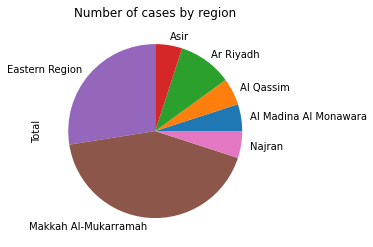

In [ ]:
#Pie chart of no. of cases by regoin 
Data["Total"] = Data["Cases"].sum()
Data.set_index('City', inplace = True)
Data = Data.groupby('region', axis = 0).sum()
print(Data)
Data['Total'].plot(kind = "pie")
myPlot.title("Number of cases by region")
myPlot.show()